In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [22]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.294829,0.650014,1.579969,0.568282
2013-01-02,2.072950,0.037486,-0.150218,-0.805674
2013-01-03,-0.456167,1.081607,-1.448629,0.735473
2013-01-04,1.169360,-0.568496,-0.039421,-0.093009
2013-01-05,-0.789411,-0.042853,0.813939,-0.626158
2013-01-06,-1.458870,0.271248,-1.625277,0.953136


In [5]:
#Transpose
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-1.100805,0.496463,-0.506073,0.864255,-0.436296,-0.842116
B,-0.215074,-0.661860,-0.117484,2.536560,0.463101,-0.369801
C,-0.776127,0.251108,-0.567140,0.435948,-0.933790,-0.006707
D,1.482289,0.986518,0.938856,-0.138282,-0.438110,0.721502


In [6]:
df.at[dates[0], 'A']=-0
df.mean(axis=1)

2013-01-01    0.122772
2013-01-02    0.268057
2013-01-03   -0.062960
2013-01-04    0.924620
2013-01-05   -0.336274
2013-01-06   -0.124281
Freq: D, dtype: float64

In [7]:
np.random.randn(8)

array([-1.07339081, -0.25292612, -0.91236746,  1.02424278, -0.14136816,
        1.08743869,  0.56031581, -0.20230186])

In [8]:
# tuples = list(zip(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
#                     ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']))
# OR
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))
tuples


[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [9]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [10]:
# initializing lists 
  
name = [ "Manjeet", "Nikhil", "Shambhavi", "Astha" ] 
roll_no = [ 4, 1, 3, 2 ] 
marks = [ 40, 50, 60, 70 ] 
  
# using zip() to map values 
mapped = zip(name, roll_no, marks) 
  
# converting values to print as list 
mapped = list(mapped) 
  
# printing resultant values  
print ("The zipped result is : ",end="") 
print (mapped) 

The zipped result is : [('Manjeet', 4, 40), ('Nikhil', 1, 50), ('Shambhavi', 3, 60), ('Astha', 2, 70)]


In [11]:
# unzipping values 
namz, roll_noz, marksz = zip(*[('Manjeet', 4, 40), ('Nikhil', 1, 50), ('Shambhavi', 3, 60), ('Astha', 2, 70)])
print(namz)
print(roll_noz)
print(marksz)

('Manjeet', 'Nikhil', 'Shambhavi', 'Astha')
(4, 1, 3, 2)
(40, 50, 60, 70)


In [12]:
a,b,c,d,e,f,g,h = zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']])
print(a)
print(b)

('bar', 'one')
('bar', 'two')


In [15]:
rng = pd.date_range('1/1/2012', periods=100, freq='M')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

ts.resample('5Min').sum()
ts.to_period()

prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
prng.asfreq('M', 'e')
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9

In [20]:
df2 = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6], "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})
df2["grade"] = df2["raw_grade"].astype("category")
df2["grade"].cat.categories = ["very good", "good", "very bad"]
df2["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

In [21]:
df2["grade"] = df2["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df2["grade"] 

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

<Figure size 432x288 with 0 Axes>

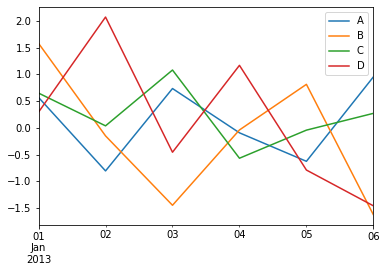

In [23]:
plt.figure()
df.plot()
plt.legend(loc='best')